In [1]:
import os
import pandas as pd
import datetime


In [2]:
df = pd.read_csv('pv_file.csv').drop_duplicates()


In [3]:
df.to_csv('pv_file_remove_dup.csv',index=None)

In [69]:
#reformat
folder_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/source/'
files = os.listdir(folder_path)
new_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/load_newmeter/'
old_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/load_oldmeter/'
column = ['datetime','timediff(ms)', 'Ia(A)',
                          'Ib(A)',
                          'Ic(A)',
                          'In(A)',
                          'Iavg(A)',
                          'Va(V)',
                          'Vb(V)',
                          'Vc(V)',
                          'Vavg(V)',
                          'Pa(kW)',
                          'Pb(kW)',
                          'Pc(kW)',
                          'Ptot(kW)',
                          'VARa(kVAR)',
                          'VARb(kVAR)',
                          'VARc(kVAR)',
                          'VARtot(kVAR)',
                          'VAa(V)',
                          'VAb(V)',
                          'VAc(V)',
                          'VAtot(V)',
                          'PFa',
                          'PFb',
                          'PFc',
                          'PFtot',
                          'DFa',
                          'DFb',
                          'DFc',
                          'DFtot']
error_list = []
for file in files:
    if file.lower().startswith('load_gw') and file.lower().endswith('.csv'):
        df = pd.read_csv(folder_path  + file)
        print('importing' + folder_path  + file )
        df.columns = ['DateTime', 'Energy(Wh)']
        
    elif file.lower().startswith('load507') and file.lower().endswith('.csv'):
        try :
            df = pd.read_csv(folder_path  + file,header = None ).dropna(axis = 0)
            df1 = pd.DataFrame(columns = column)
            print('importing' + folder_path  + file )
        
            start_value = df.iloc[0,0] 
            if len(file[4:-4]) == 3 :
                date = '2023' + file[-6:-4] + '0' + file[4]
            elif len(file[4:-4]) == 4 :
                date = '2023' + file[-6:-4] + file[4:6]
            
            start_date = datetime.datetime(int(date[:4]),int(date[4:6]),int(date[6:8]))
            
            if len(df.columns) == 30 :
                
                df.iloc[:,0] = (df.iloc[:,0] - start_value)*1000
                df1[column[1:]] = df
                df1['datetime'] = df1['timediff(ms)'].apply(lambda x: start_date + datetime.timedelta(milliseconds = x))
                df1.to_excel(new_path + 'load_newmeter_' + date + '.xlsx',index = False)
                print('export finished')
            if len(df.columns) == 12 :
                df.iloc[:,0] = (df.iloc[:,0] - start_value)*1000
                
                
                
                df1[['timediff(ms)','Ia(A)','Ib(A)','Ic(A)','Pa(kW)','Pb(kW)','Pc(kW)','Ptot(kW)','VAa(V)','VAb(V)','VAc(V)','VAtot(V)']] = df
                df1[['Pa(kW)','Pb(kW)','Pc(kW)','Ptot(kW)']] = df1[['Pa(kW)','Pb(kW)','Pc(kW)','Ptot(kW)']]/1000
                df1['datetime'] = df1['timediff(ms)'].apply(lambda x: start_date + datetime.timedelta(milliseconds = x))
                df1.to_excel(old_path + 'load_oldmeter_' + date + '.xlsx',index = False)
                print('export finished')
        except Exception as e :
                error_list.append( [file,str(e)])
if error_list != [] :
    error_list = pd.DataFrame(error_list)
    error_list.to_excel('error_log.xlsx',index = False)

            


importingC:/Users/User/Desktop/VSCpython/senior_prj/source/load507.csv
export finished


In [2]:
column = ['datetime','timediff(ms)', 'Ia(A)',
                          'Ib(A)',
                          'Ic(A)',
                          'In(A)',
                          'Iavg(A)',
                          'Va(V)',
                          'Vb(V)',
                          'Vc(V)',
                          'Vavg(V)',
                          'Pa(kW)',
                          'Pb(kW)',
                          'Pc(kW)',
                          'Ptot(kW)',
                          'VARa(kVAR)',
                          'VARb(kVAR)',
                          'VARc(kVAR)',
                          'VARtot(kVAR)',
                          'VAa(V)',
                          'VAb(V)',
                          'VAc(V)',
                          'VAtot(V)',
                          'PFa',
                          'PFb',
                          'PFc',
                          'PFtot',
                          'DFa',
                          'DFb',
                          'DFc',
                        'DFtot']

In [ ]:
#old downsampling
folder_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/load_reformat/'
files = os.listdir(folder_path) 
output_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/load_downsampling/'
for file in files :
    if (file.lower().startswith('load_new')  or  file.lower().startswith('load_old') ) and file.lower().endswith('.xlsx') :
        df = pd.read_excel(folder_path  + file )
        print('importing' + folder_path  + file )
        start_date = file[-13:-5]
        start_date = datetime.datetime(int(start_date[:4]),int(start_date[4:6]),int(start_date[6:8]))
        df['period'] = 0
        df['period'][:-1] = pd.Series( df['timediff(ms)']).diff(periods= 1 )[1:]
        df['datetime'] = start_date + (df['timediff(ms)']//900000)*datetime.timedelta(minutes = 15)
        print('a')
        for e in column[2:32] :
            df[e] = df[e] * df['period']
        df_return = df.groupby('datetime').sum(column[2:32])
        for e in column[2:32] :
            df_return[e] = df_return[e]/df_return['period']
        print('b')
        df_return.drop(['timediff(ms)','period'],axis = 1,inplace = True)
        df_return.to_excel(output_path + file )
        print('export finished')


In [ ]:
# downsampling 15 min
folder_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/load_reformat/'
files = os.listdir(folder_path) 
output_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/load_downsampling_new/'
for file in files :
    if (file.lower().startswith('load_new')  or  file.lower().startswith('load_old') ) and file.lower().endswith('.xlsx') :
        df = pd.read_excel(folder_path  + file )
        print('importing' + folder_path  + file )
        start_date = file[-13:-5]
        start_date = datetime.datetime(int(start_date[:4]),int(start_date[4:6]),int(start_date[6:8]))
        df['period'] = 0
        df['period'][:-1] = pd.Series( df['timediff(ms)']).diff(periods= 1 )[1:]
        
        df['timediff(ms)'] = (df['timediff(ms)']//450000 + 1)//2
        df = df[df['timediff(ms)'] < 96]
        df['datetime'] = start_date + (df['timediff(ms)'])*datetime.timedelta(minutes = 15)
        #print('a')
        for e in column[2:32] :
            df[e] = df[e] * df['period']
        df_return = df.groupby('datetime').sum(column[2:32])
        for e in column[2:32] :
            df_return[e] = df_return[e]/df_return['period']
        #print('b')
        df_return.drop(['timediff(ms)','period'],axis = 1,inplace = True)
        
        df_return.to_excel(output_path + file )
        print(file,'export finished')

In [ ]:
# downsampling 1 min
folder_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/load_reformat/'
files = os.listdir(folder_path) 
output_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/load_downsampling_1_min/'
for file in files :
    if (file.lower().startswith('load_new')  or  file.lower().startswith('load_old') ) and file.lower().endswith('.xlsx') :
        df = pd.read_excel(folder_path  + file )
        print('importing' + folder_path  + file )
        start_date = file[-13:-5]
        start_date = datetime.datetime(int(start_date[:4]),int(start_date[4:6]),int(start_date[6:8]))
        df['period'] = 0
        df['period'][:-1] = pd.Series( df['timediff(ms)']).diff(periods= 1 )[1:]
        
        df['timediff(ms)'] = (df['timediff(ms)']//30000 + 1)//2
        df = df[df['timediff(ms)'] < 1440]
        df['datetime'] = start_date + (df['timediff(ms)'])*datetime.timedelta(minutes = 1)
        #print('a')
        for e in column[2:32] :
            df[e] = df[e] * df['period']
        df_return = df.groupby('datetime').sum(column[2:32])
        for e in column[2:32] :
            df_return[e] = df_return[e]/df_return['period']
        #print('b')
        df_return.drop(['timediff(ms)','period'],axis = 1,inplace = True)
        
        df_return.to_excel(output_path + file )
        print(file,'export finished')

In [5]:
folder_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/load_downsampling_1_min/'
files = os.listdir(folder_path) 
output_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/'
df_return = pd.DataFrame([])
for file in files :
    if (file.lower().startswith('load_new')  or  file.lower().startswith('load_old') ) and file.lower().endswith('.xlsx') :
        df = pd.read_excel(folder_path  + file )
        df_return = pd.concat([df_return,df],axis = 0)
df_return.to_excel(output_path + 'load_archive_1mins.xlsx' ,index = None)

###### EXperiment Zone

In [3]:
folder_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/load_downsampling_new/'
files = os.listdir(folder_path) 
output_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/'
non_valid_list = []
for file in files :
    if (file.lower().startswith('load_new')  or  file.lower().startswith('load_old') ) and file.lower().endswith('.xlsx') :
        df = pd.read_excel(folder_path  + file )
        if len(df['datetime']) != 96 :
            non_valid_list.append([file,len(df['datetime'])])


In [4]:
non_valid_list

[['load_newmeter_20230615.xlsx', 7],
 ['load_oldmeter_20230315.xlsx', 92],
 ['load_oldmeter_20230328.xlsx', 84],
 ['load_oldmeter_20230330.xlsx', 56],
 ['load_oldmeter_20230331.xlsx', 83],
 ['load_oldmeter_20230406.xlsx', 84]]

In [10]:
folder_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/PV_data_downsampling/PV data resampling/'
files = os.listdir(folder_path) 
output_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/'
df_return = pd.DataFrame([])
for file in files :
    if file.lower().startswith('pv') and file.lower().endswith('.csv') :
        df = pd.read_csv(folder_path  + file )
        df_return = pd.concat([df_return,df.iloc[0:96,:]],axis = 0)
df_return.to_excel(output_path + 'pv_archive.xlsx' ,index = None)        

In [8]:
non_valid_list

[['PV_8kW_20230311.csv', 97],
 ['PV_8kW_20230313.csv', 83],
 ['PV_8kW_20230314.csv', 71],
 ['PV_8kW_20230316.csv', 97],
 ['PV_8kW_20230321.csv', 98],
 ['PV_8kW_20230326.csv', 97],
 ['PV_8kW_20230327.csv', 97],
 ['PV_8kW_20230331.csv', 97],
 ['PV_8kW_20230403.csv', 90],
 ['PV_8kW_20230407.csv', 97],
 ['PV_8kW_20230410.csv', 97],
 ['PV_8kW_20230411.csv', 97],
 ['PV_8kW_20230415.csv', 97],
 ['PV_8kW_20230417.csv', 97],
 ['PV_8kW_20230420.csv', 97],
 ['PV_8kW_20230421.csv', 97],
 ['PV_8kW_20230505.csv', 97],
 ['PV_8kW_20230510.csv', 97],
 ['PV_8kW_20230511.csv', 97],
 ['PV_8kW_20230518.csv', 97],
 ['PV_8kW_20230521.csv', 97],
 ['PV_8kW_20230524.csv', 97],
 ['PV_8kW_20230525.csv', 98],
 ['PV_8kW_20230528.csv', 97],
 ['PV_8kW_20230530.csv', 97],
 ['PV_8kW_20230531.csv', 97],
 ['PV_8kW_20230603.csv', 97],
 ['PV_8kW_20230607.csv', 97],
 ['PV_8kW_20230608.csv', 97],
 ['PV_8kW_20230610.csv', 97],
 ['PV_8kW_20230616.csv', 97],
 ['PV_8kW_20230618.csv', 97],
 ['PV_8kW_20230620.csv', 97],
 ['PV_8kW_

In [ ]:
PL PV Buy_rate Sell_rate Expense.'

In [15]:
folder_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/sol/'
files = os.listdir(folder_path) 
columns = ['Pchg(kW)','Pdchg(kW)','soc(%)','xchg','xdchg','u','Pload(kW)','PV(kW)','Buy_rate(Baht/unit)','Sell_rate(Baht/unit)','Revenue(Baht)']
output_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/sol_format/'
df_return = pd.DataFrame([])
for file in files :
    
        df = pd.read_csv(folder_path  + file ,names=columns)
        
        df.to_csv(output_path + file ,index = None)

In [12]:
folder_path = 'C:/Users/User/Desktop/VSCpython/senior_prj/sol/'
columns = ['Pchg(kW)','Pdchg(kW)','soc(%)','xchg','xdchg','u','Pload(kW)','PV(kW)','Buy_rate(Baht/unit)','Sell_rate(Baht/unit)','Revenue(Baht)']
df = pd.read_csv(folder_path  + 'highsolar_sol.csv' ,names=columns)


In [13]:
df

,Pchg(kW),Pdchg(kW),soc(%),xchg,xdchg,u,Pload(kW),PV(kW),Buy_rate(Baht/unit),Sell_rate(Baht/unit),Revenue(Baht)
0,0,0.00000,10.0,0,0,6.9546,2.73080,0.05978,2.6037,2,-1.73870
1,0,0.00000,10.0,0,0,5.5343,2.18530,0.05978,2.6037,2,-1.38360
2,0,0.00000,10.0,0,0,1.9834,0.82154,0.05978,2.6037,2,-0.49585
3,0,0.00000,10.0,0,0,1.5735,0.66412,0.05978,2.6037,2,-0.39338
4,0,0.00000,10.0,0,0,1.4591,0.62017,0.05978,2.6037,2,-0.36477
...,...,...,...,...,...,...,...,...,...,...,...
379,0,0.00000,5.0,0,0,19.2190,7.42170,0.04040,2.6037,2,-4.80470
380,0,0.00000,5.0,0,0,18.6210,7.19210,0.04040,2.6037,2,-4.65520
381,0,0.00000,5.0,0,0,14.8200,5.73250,0.04040,2.6037,2,-3.70510
382,0,0.00000,5.0,0,0,14.6370,5.66200,0.04040,2.6037,2,-3.65920


In [2]:
import matplotlib.pyplot as plt
dfdown = pd.read_excel('load_downsampling_15_mins/load_newmeter_20230508.xlsx')
dfraw  = pd.read_excel('load_reformat/load_newmeter_20230508.xlsx')






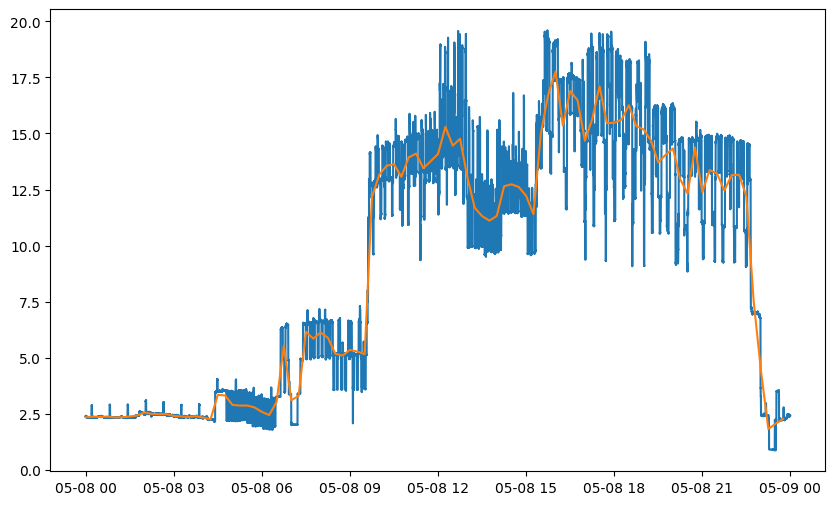

In [3]:
plt.figure(figsize=(10,6))
plt.plot(dfraw['datetime'],dfraw['Ptot(kW)'])
plt.plot(dfdown['datetime'],dfdown['Ptot(kW)'])

plt.show()

In [4]:
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211956 entries, 0 to 211955
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   datetime      211956 non-null  datetime64[ns]
 1   timediff(ms)  211956 non-null  float64       
 2   Ia(A)         211956 non-null  float64       
 3   Ib(A)         211956 non-null  float64       
 4   Ic(A)         211956 non-null  float64       
 5   In(A)         211956 non-null  float64       
 6   Iavg(A)       211956 non-null  float64       
 7   Va(V)         211956 non-null  float64       
 8   Vb(V)         211956 non-null  float64       
 9   Vc(V)         211956 non-null  float64       
 10  Vavg(V)       211956 non-null  float64       
 11  Pa(kW)        211956 non-null  float64       
 12  Pb(kW)        211956 non-null  float64       
 13  Pc(kW)        211956 non-null  float64       
 14  Ptot(kW)      211956 non-null  float64       
 15  VARa(kVAR)    211

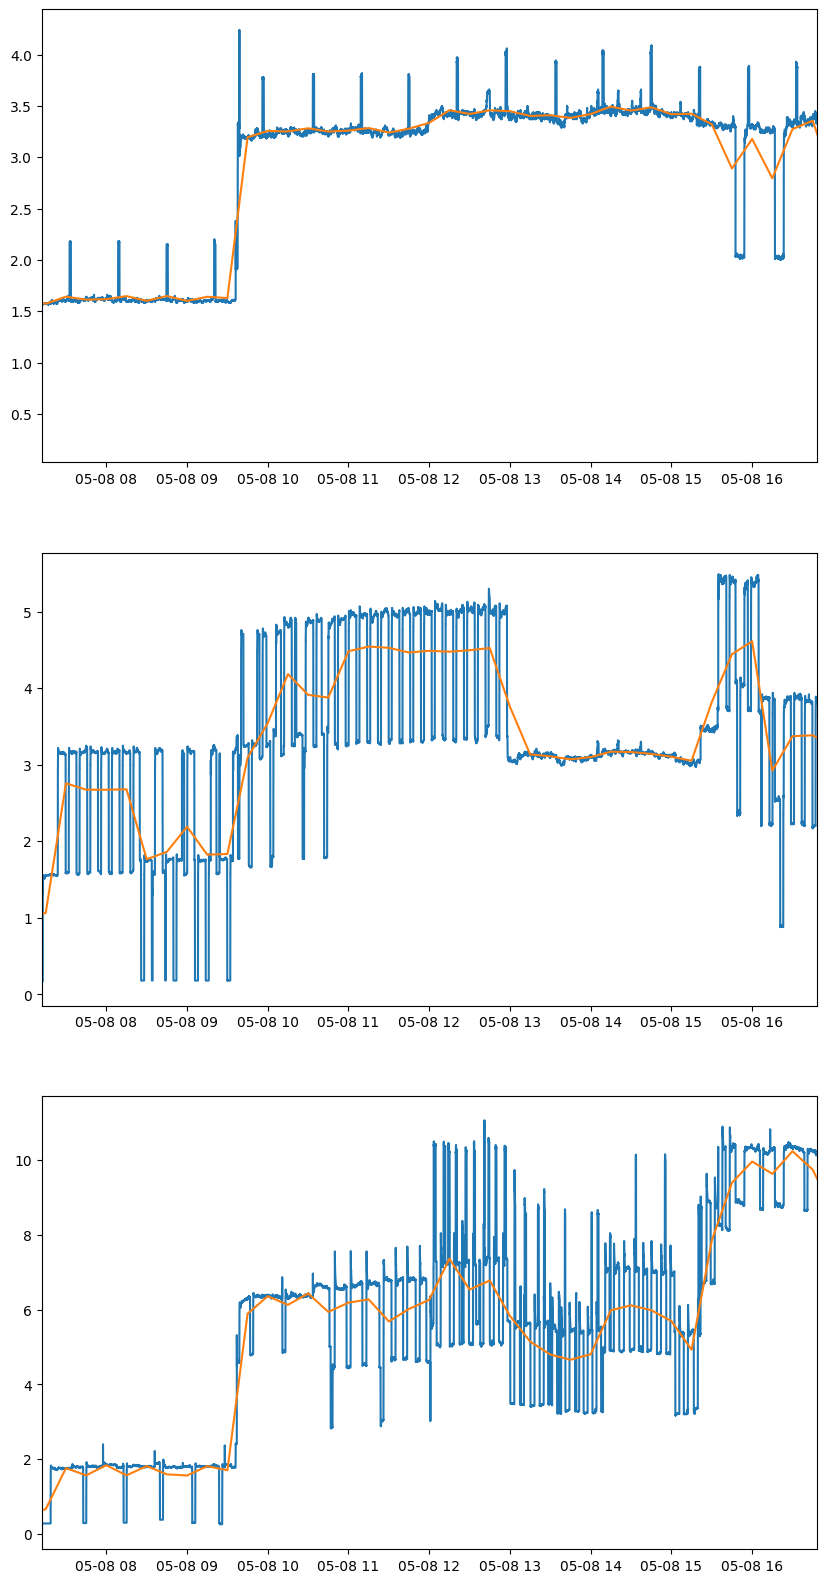

In [25]:

fig,ax = plt.subplots(3,1,figsize=(10,20))

ax[0].plot(dfraw['datetime'],dfraw['Pa(kW)'])

ax[0].plot(dfdown['datetime'],dfdown['Pa(kW)'])
ax[0].set_xlim(19485.3, 19485.7)
ax[1].plot(dfraw['datetime'],dfraw['Pb(kW)'])
ax[1].plot(dfdown['datetime'],dfdown['Pb(kW)'])
ax[1].set_xlim(19485.3, 19485.7)

ax[2].plot(dfraw['datetime'],dfraw['Pc(kW)'])
ax[2].plot(dfdown['datetime'],dfdown['Pc(kW)'])
ax[2].set_xlim(19485.3, 19485.7)

plt.show()